<a href="https://colab.research.google.com/github/milenar18/Topicos_Aplicada_II-Tutorial_3/blob/main/Exercise_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

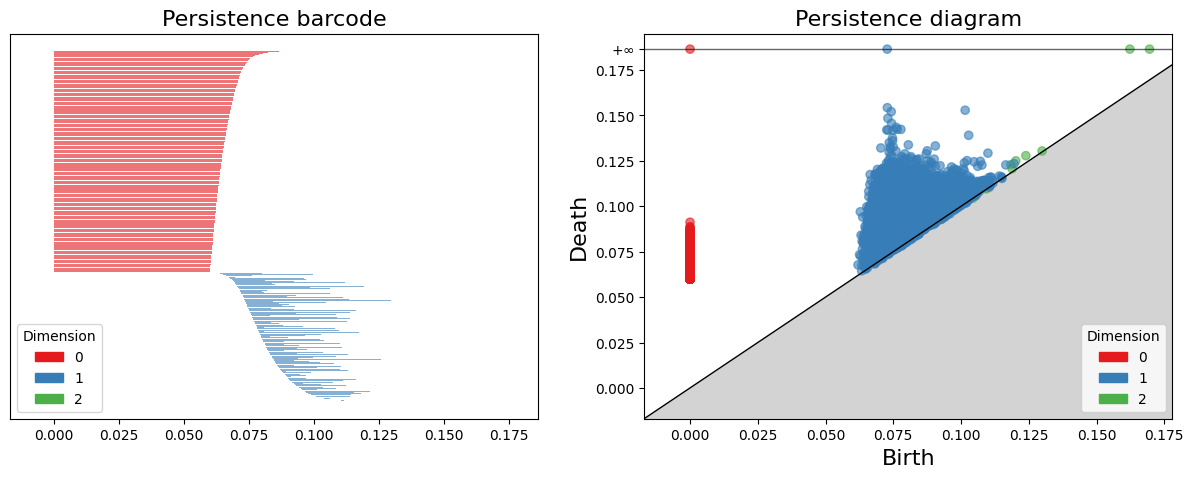

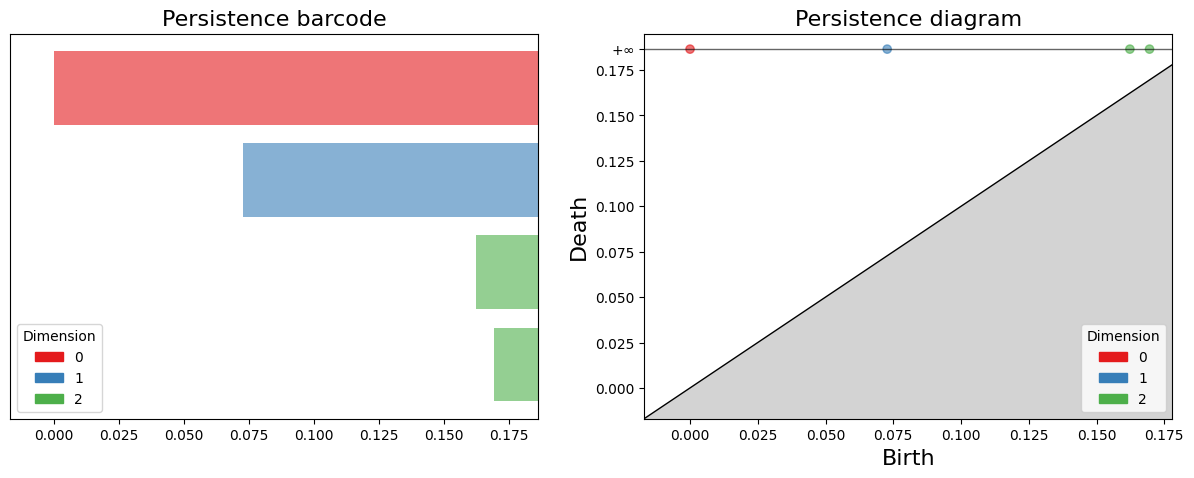

In [1]:
# Instalar a biblioteca GUDHI
!pip install -q gudhi

# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Carregar os dados do arquivo Cy8.txt
arquivo = 'Cy8.txt'

with open(arquivo, 'r') as f:
    linhas = f.read().strip().split('\n')
    X = np.array([[float(valor) for valor in linha.split()] for linha in linhas])

# Criação o complexo de Rips a partir dos dados
rips = gudhi.RipsComplex(points=X / 2, max_edge_length=0.3)

# Construção da árvore de símplices (simplex tree) até dimensão 3
st = rips.create_simplex_tree(max_dimension=3)

# Calcular a homologia persistente
barcode = st.persistence(homology_coeff_field=2)

# Plotar os códigos de barras e o diagrama de persistência completos
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

gudhi.plot_persistence_barcode(barcode, axes=ax1)
gudhi.plot_persistence_diagram(barcode, axes=ax2)

# Recalcular a persistência filtrando apenas barras "longas"
barcode_filtrado = st.persistence(homology_coeff_field=2, min_persistence=0.2)

# Plotar os gráficos filtrados
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

gudhi.plot_persistence_barcode(barcode_filtrado, axes=ax1)
gudhi.plot_persistence_diagram(barcode_filtrado, axes=ax2)